In [1]:
import fastf1
import pandas as pd
from scipy import signal
import numpy as np

In [ ]:
fastf1.Cache.enable_cache('fastf1_cache/')
session = fastf1.get_session(2023, "Azerbaijan Grand Prix", "R")
session.load()

In [74]:
lap = session.laps.loc[session.laps.index == 182]

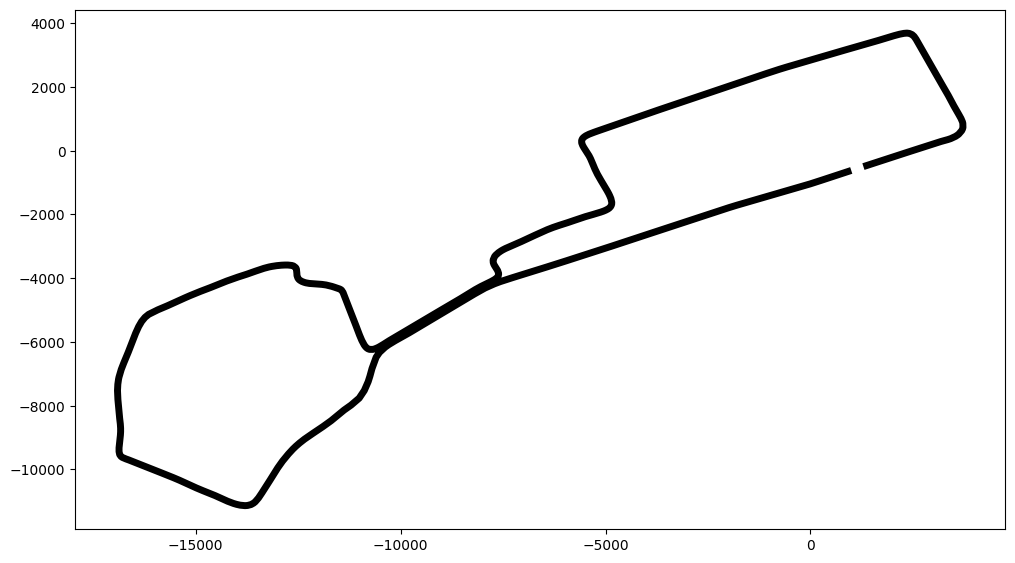

In [75]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
data = lap.get_pos_data()
ax.plot(data['X'], data['Y'], color='black', linestyle='-', linewidth=5, zorder=0)
plt.show()

In [101]:
pos_data = lap.get_pos_data()
pos_data = pos_data["X"]
pos_data /= 10

In [102]:
pos_data = pos_data.to_numpy()

In [103]:
def plot(pos_data, window_length, polyorder):
    smooth = signal.savgol_filter(pos_data, window_length=window_length, polyorder=polyorder, mode="nearest")
    smooth = pd.DataFrame(smooth)
    smooth.plot()

<Axes: >

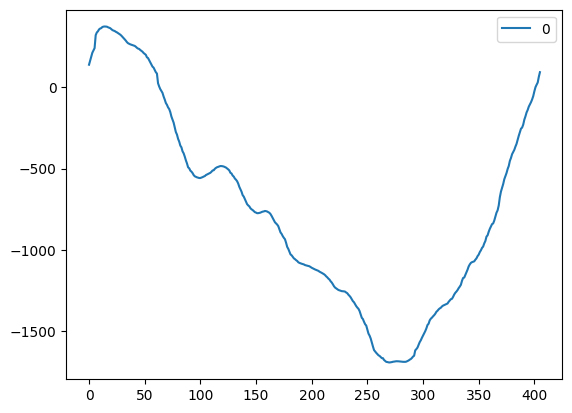

In [104]:
raw = pd.DataFrame(pos_data)
raw.plot()

<Axes: >

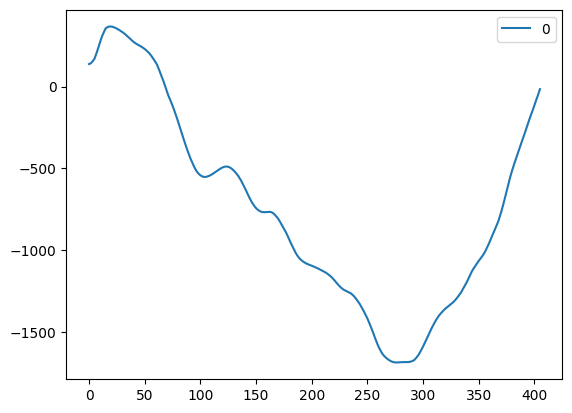

In [105]:
padded_pos_data = np.concatenate(([pos_data[0] for _ in range(9)], pos_data))
naiive_conv = np.convolve(padded_pos_data, [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], mode="valid")
naiive_conv = pd.DataFrame(naiive_conv)
naiive_conv.plot()

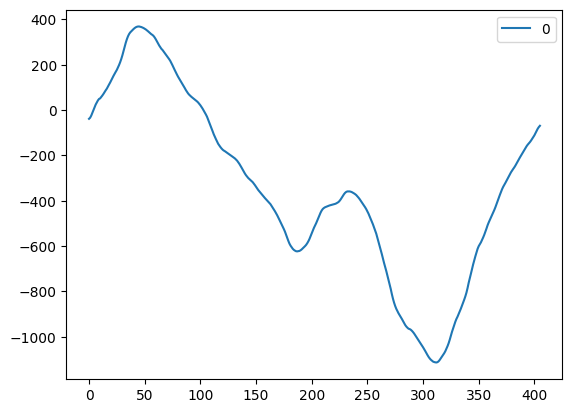

In [95]:
plot(pos_data, window_length=10, polyorder=2)

In [82]:
signal.savgol_coeffs(window_length=10, polyorder=2)

array([-0.0875 ,  0.0375 ,  0.13125,  0.19375,  0.225  ,  0.225  ,
        0.19375,  0.13125,  0.0375 , -0.0875 ])